In [1]:
import os
os.chdir("D://Master//10. TFM//Data")

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from scipy.stats import boxcox, probplot, norm, shapiro
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.cluster import KMeans, AffinityPropagation, DBSCAN
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import shapiro, probplot
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
from pyclustering.cluster.kmedians import kmedians
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster import cluster_visualizer
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score
import numpy as np
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import davies_bouldin_score
from sklearn_extra.cluster import KMedoids

In [3]:
df = pd.read_csv("df_robust.csv")
df.head()

,price,review_score,year,month,day_of_week,city_belo horizonte,city_brasilia,city_campinas,city_curitiba,city_guarulhos,...,category_moveis_decoracao,category_otras categorias,category_relogios_presentes,category_telefonia,category_utilidades_domesticas,payment_boleto,payment_credit_card,payment_debit_card,payment_varios,payment_voucher
0,-0.168421,0.0,-1.0,0.6,-0.333333,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.200000,0.0,-1.0,0.0,-0.333333,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
2,-0.105263,-1.0,0.0,-0.2,0.333333,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.168421,0.0,-1.0,0.4,-0.666667,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.168421,0.0,-1.0,0.4,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Eliminamos la variable unnamed que se ha generado con el csv y la variable customer_zip_code_prefix que, siendo categórica, presenta muchos valores distintos y puede perjudicar la calidad de los resultados.

### Prueba del codo y K-Means

In [4]:
subset_df = df.sample(frac=0.1, random_state=42)

In [5]:
cluster_range = range(1, 20)
cluster_wss = []

for cluster in cluster_range:
    model = KMedoids(n_clusters=cluster)
    model.fit(subset_df)
    cluster_wss.append(model.inertia_)

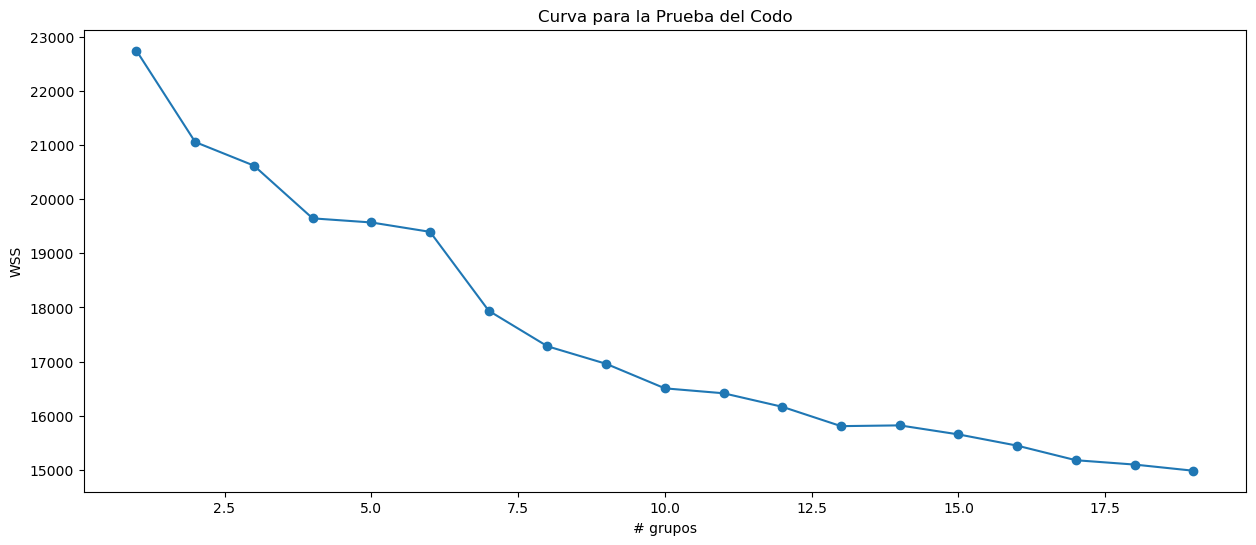

In [31]:
plt.figure(figsize=[15,6])
plt.title('Curva para la Prueba del Codo')
plt.xlabel('# grupos')
plt.ylabel('WSS')
plt.plot(list(cluster_range),cluster_wss,marker='o')
plt.show()

Elegimos k=2 al ser el punto en el que parece estabilizarse la caída de la curva

In [7]:
model = kmedoids = KMedoids(n_clusters=2, random_state=0).fit(subset_df)

In [8]:
labels = kmedoids.labels_

In [9]:
kmedoids.predict

<bound method KMedoids.predict of KMedoids(n_clusters=2, random_state=0)>

In [10]:
kmedoids.cluster_centers_

array([[ 0.57989474, -1.        , -1.        ,  0.6       ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [-0.05263158, -1.        ,  0.        , -0.2       ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.

In [11]:
kmedoids.inertia_

21055.892280690132

In [12]:
df_total = subset_df.copy()
df_total['cluster']=model.predict(subset_df)
df_total[:3]

,price,review_score,year,month,day_of_week,city_belo horizonte,city_brasilia,city_campinas,city_curitiba,city_guarulhos,...,category_otras categorias,category_relogios_presentes,category_telefonia,category_utilidades_domesticas,payment_boleto,payment_credit_card,payment_debit_card,payment_varios,payment_voucher,cluster
8684,0.536842,-2.5,-1.0,0.2,-0.333333,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
36249,0.785158,-2.5,0.0,0.4,0.333333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
22089,0.264105,-1.0,0.0,0.2,-0.666667,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [13]:
centroids = model.cluster_centers_

# Convertir los centroides a un DataFrame para facilitar su visualización
centroids_df = pd.DataFrame(centroids, columns=subset_df.columns)

# Imprimir los centroides
centroids
centroids_df

,price,review_score,year,month,day_of_week,city_belo horizonte,city_brasilia,city_campinas,city_curitiba,city_guarulhos,...,category_moveis_decoracao,category_otras categorias,category_relogios_presentes,category_telefonia,category_utilidades_domesticas,payment_boleto,payment_credit_card,payment_debit_card,payment_varios,payment_voucher
0,0.579895,-1.0,-1.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.052632,-1.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
absolute_differences = centroids_df.diff().abs().sum(axis=0)
absolute_differences.head(20)

price                         0.632526
review_score                  0.000000
year                          1.000000
month                         0.800000
day_of_week                   0.000000
city_belo horizonte           0.000000
city_brasilia                 0.000000
city_campinas                 0.000000
city_curitiba                 0.000000
city_guarulhos                0.000000
city_otras ciudades           0.000000
city_porto alegre             0.000000
city_rio de janeiro           0.000000
city_salvador                 0.000000
city_sao bernardo do campo    0.000000
city_sao paulo                0.000000
state_AC                      0.000000
state_AL                      0.000000
state_AM                      0.000000
state_AP                      0.000000
dtype: float64

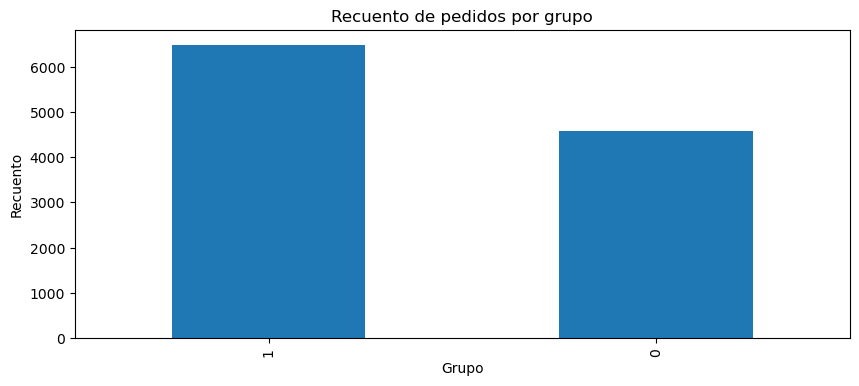

In [15]:
df_total.cluster.value_counts().plot(kind='bar', figsize=(10,4))
plt.title('Recuento de pedidos por grupo')
plt.xlabel('Grupo')
_ = plt.ylabel('Recuento')

In [16]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(subset_df, labels)

In [17]:
silhouette_avg

0.12182700757895422

In [18]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score = calinski_harabasz_score(subset_df,labels)

In [19]:
davies_bouldin_score(subset_df, labels)


2.751358118746819

In [20]:
# Dataframe con las medias de las variables en cada uno de los grupos
descriptivos_grupos = df_total.groupby(['cluster'],as_index=False).mean()
descriptivos_grupos

,cluster,price,review_score,year,month,day_of_week,city_belo horizonte,city_brasilia,city_campinas,city_curitiba,...,category_moveis_decoracao,category_otras categorias,category_relogios_presentes,category_telefonia,category_utilidades_domesticas,payment_boleto,payment_credit_card,payment_debit_card,payment_varios,payment_voucher
0,0,0.551863,-0.749071,-0.889884,0.513568,-0.068313,0.0,0.0,0.0,0.0,...,0.0,0.371641,0.0,0.0,0.0,0.0,-0.247324,0.0,0.0,0.0
1,1,0.015165,-0.754962,-0.146792,-0.369288,-0.088988,0.0,0.0,0.0,0.0,...,0.0,0.343130,0.0,0.0,0.0,0.0,-0.265425,0.0,0.0,0.0


### Análisis de componentes principales

In [21]:
pca = PCA()
principal_components = pca.fit_transform(subset_df)
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)
target_variance_ratio = 0.95
num_components_for_target_variance = np.argmax(explained_variance_ratio_cumulative >= target_variance_ratio) + 1
print(f'Número de componentes para el {target_variance_ratio*100}% de varianza explicada: {num_components_for_target_variance}')


Número de componentes para el 95.0% de varianza explicada: 8


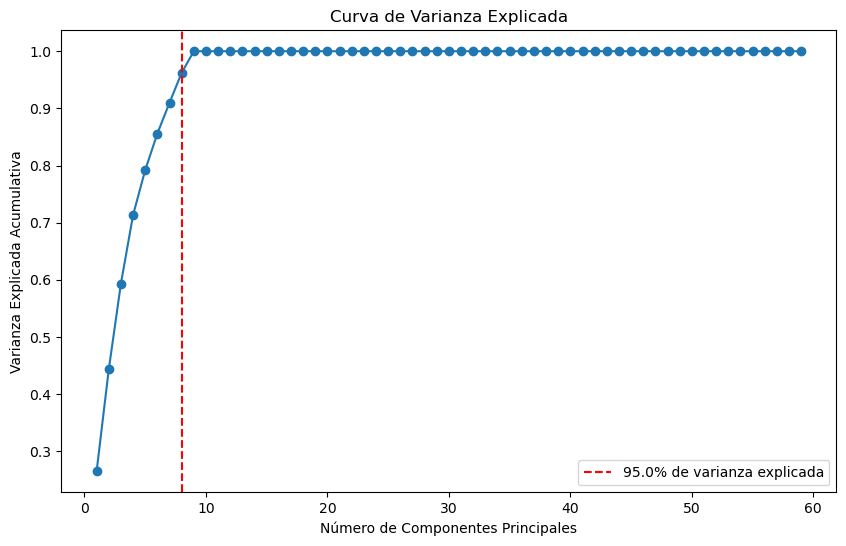

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio_cumulative) + 1), explained_variance_ratio_cumulative, marker='o')
plt.axvline(x=num_components_for_target_variance, color='red', linestyle='--', label=f'{target_variance_ratio*100}% de varianza explicada')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.title('Curva de Varianza Explicada')
plt.legend()
plt.show()

In [23]:
explained_variance_ratio = pca.explained_variance_ratio_
for i, ratio in enumerate(explained_variance_ratio, 1):
    print(f'Componente {i}: {ratio*100:.2f}% de varianza explicada')

Componente 1: 26.51% de varianza explicada
Componente 2: 17.81% de varianza explicada
Componente 3: 15.03% de varianza explicada
Componente 4: 11.99% de varianza explicada
Componente 5: 7.88% de varianza explicada
Componente 6: 6.38% de varianza explicada
Componente 7: 5.40% de varianza explicada
Componente 8: 5.22% de varianza explicada
Componente 9: 3.79% de varianza explicada
Componente 10: 0.00% de varianza explicada
Componente 11: 0.00% de varianza explicada
Componente 12: 0.00% de varianza explicada
Componente 13: 0.00% de varianza explicada
Componente 14: 0.00% de varianza explicada
Componente 15: 0.00% de varianza explicada
Componente 16: 0.00% de varianza explicada
Componente 17: 0.00% de varianza explicada
Componente 18: 0.00% de varianza explicada
Componente 19: 0.00% de varianza explicada
Componente 20: 0.00% de varianza explicada
Componente 21: 0.00% de varianza explicada
Componente 22: 0.00% de varianza explicada
Componente 23: 0.00% de varianza explicada
Componente 24: 0

In [24]:
pca2 = PCA(n_components=8)
pc = pca2.fit_transform(subset_df)
pc_df = pd.DataFrame(pc)
pca = pd.concat([pc_df, df_total['cluster']],axis=1)
pca.columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','cluster']
pca[:7]

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,cluster
0,1.704858,0.329180,0.423535,-0.364281,0.907078,0.642533,-0.243654,-0.092886,NaN
1,1.752933,0.564868,0.141569,0.373327,0.238201,-0.380731,-0.653552,0.324234,NaN
2,0.245263,0.064554,-0.134170,-0.542421,-0.523785,-0.349201,-0.191421,-0.240101,NaN
3,0.229519,-0.326789,0.867175,0.291129,0.225541,-0.344834,0.314343,-0.614008,NaN
4,0.242141,0.138580,-0.434114,-0.270887,0.751349,0.660496,0.392940,0.681760,NaN
5,-0.739972,-0.094791,-1.099463,0.184017,0.755229,0.659283,0.405499,0.685410,NaN
6,-0.753130,0.190506,-1.100319,-0.838355,0.749654,-0.342201,0.419694,0.667605,NaN


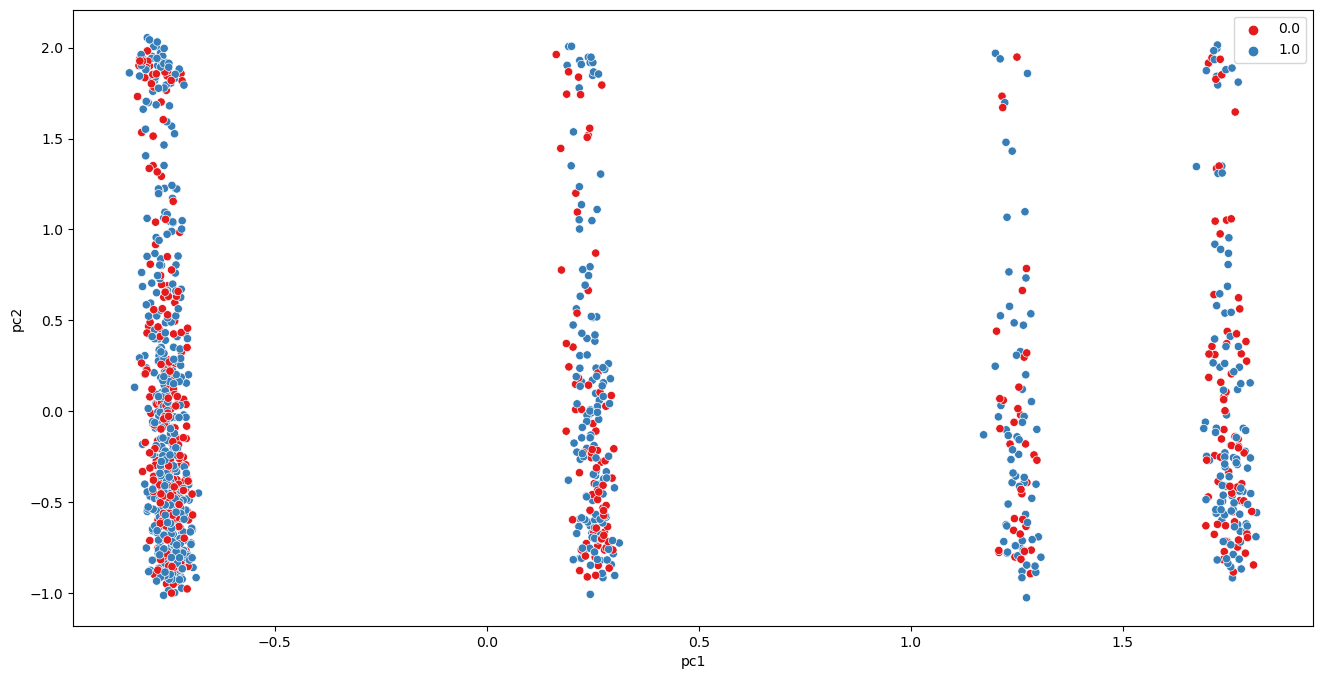

In [25]:
centroids = pca.groupby('cluster').mean()

# Grafica los puntos y los centroides
plt.figure(figsize=[16, 8])
sns.scatterplot(x='pc1', y='pc2', hue='cluster', data=pca, palette='Set1')
plt.legend()
plt.show()

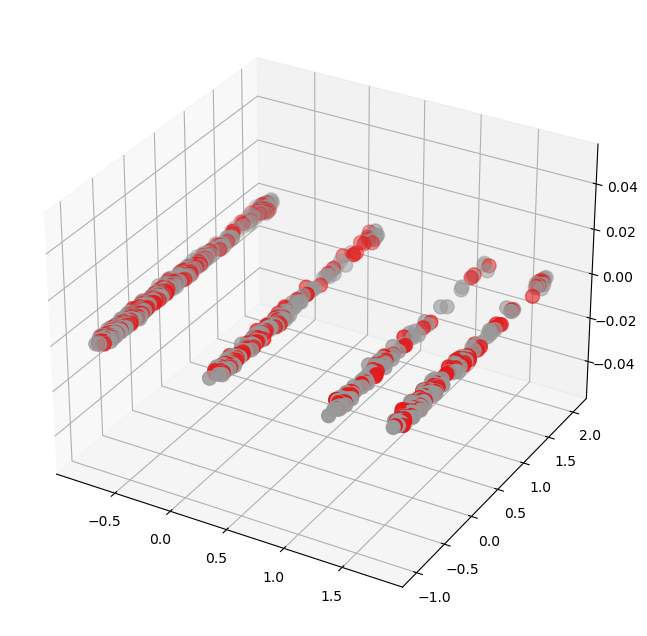

In [26]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca['pc1'], pca['pc2'], c=pca['cluster'], cmap='Set1', s=100)
plt.show()

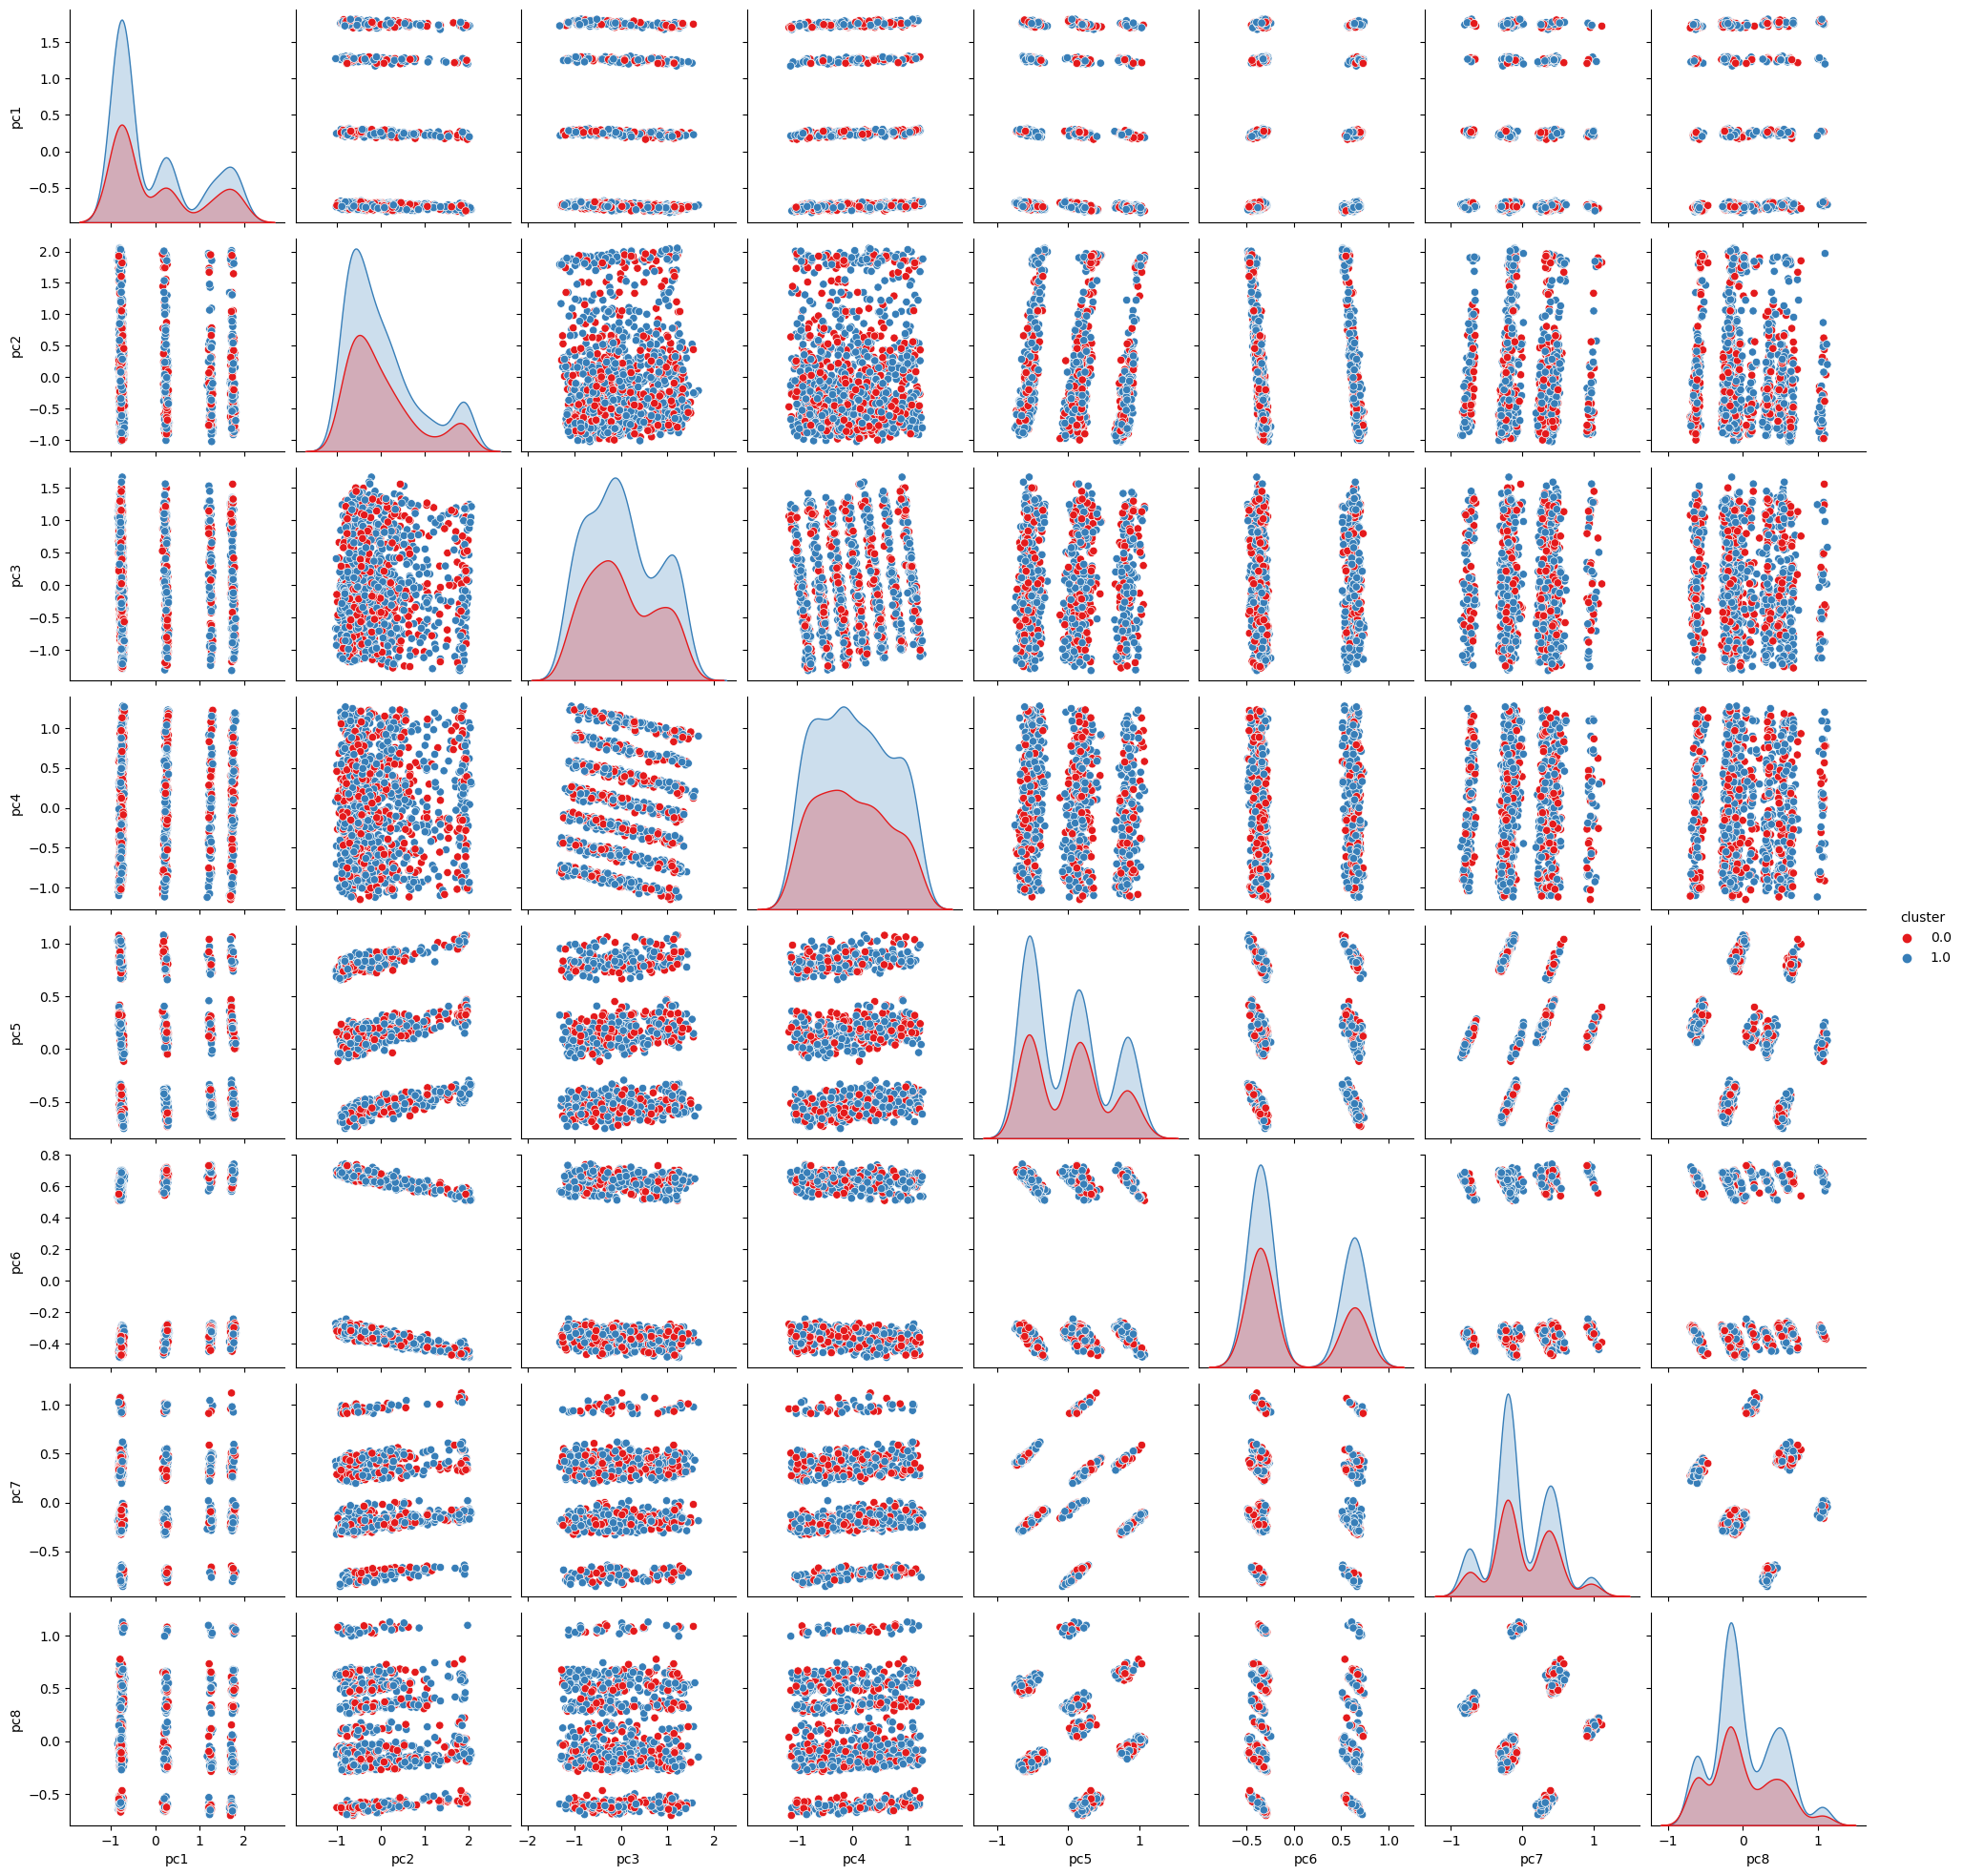

In [27]:
sns.pairplot(pca, hue='cluster', palette='Set1')
plt.show()

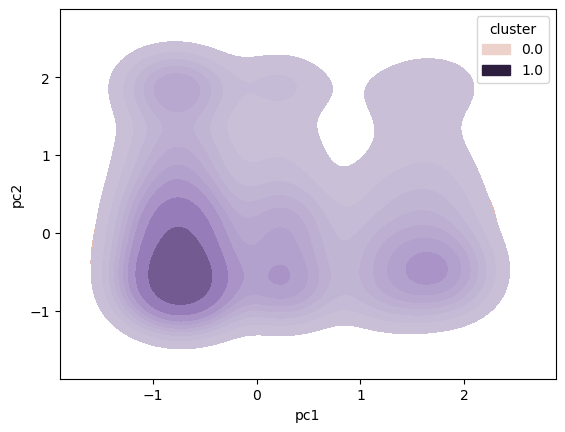

In [28]:
sns.kdeplot(data=pca, x='pc1', y='pc2', hue='cluster', fill=True, cmap='Set1')
plt.show()

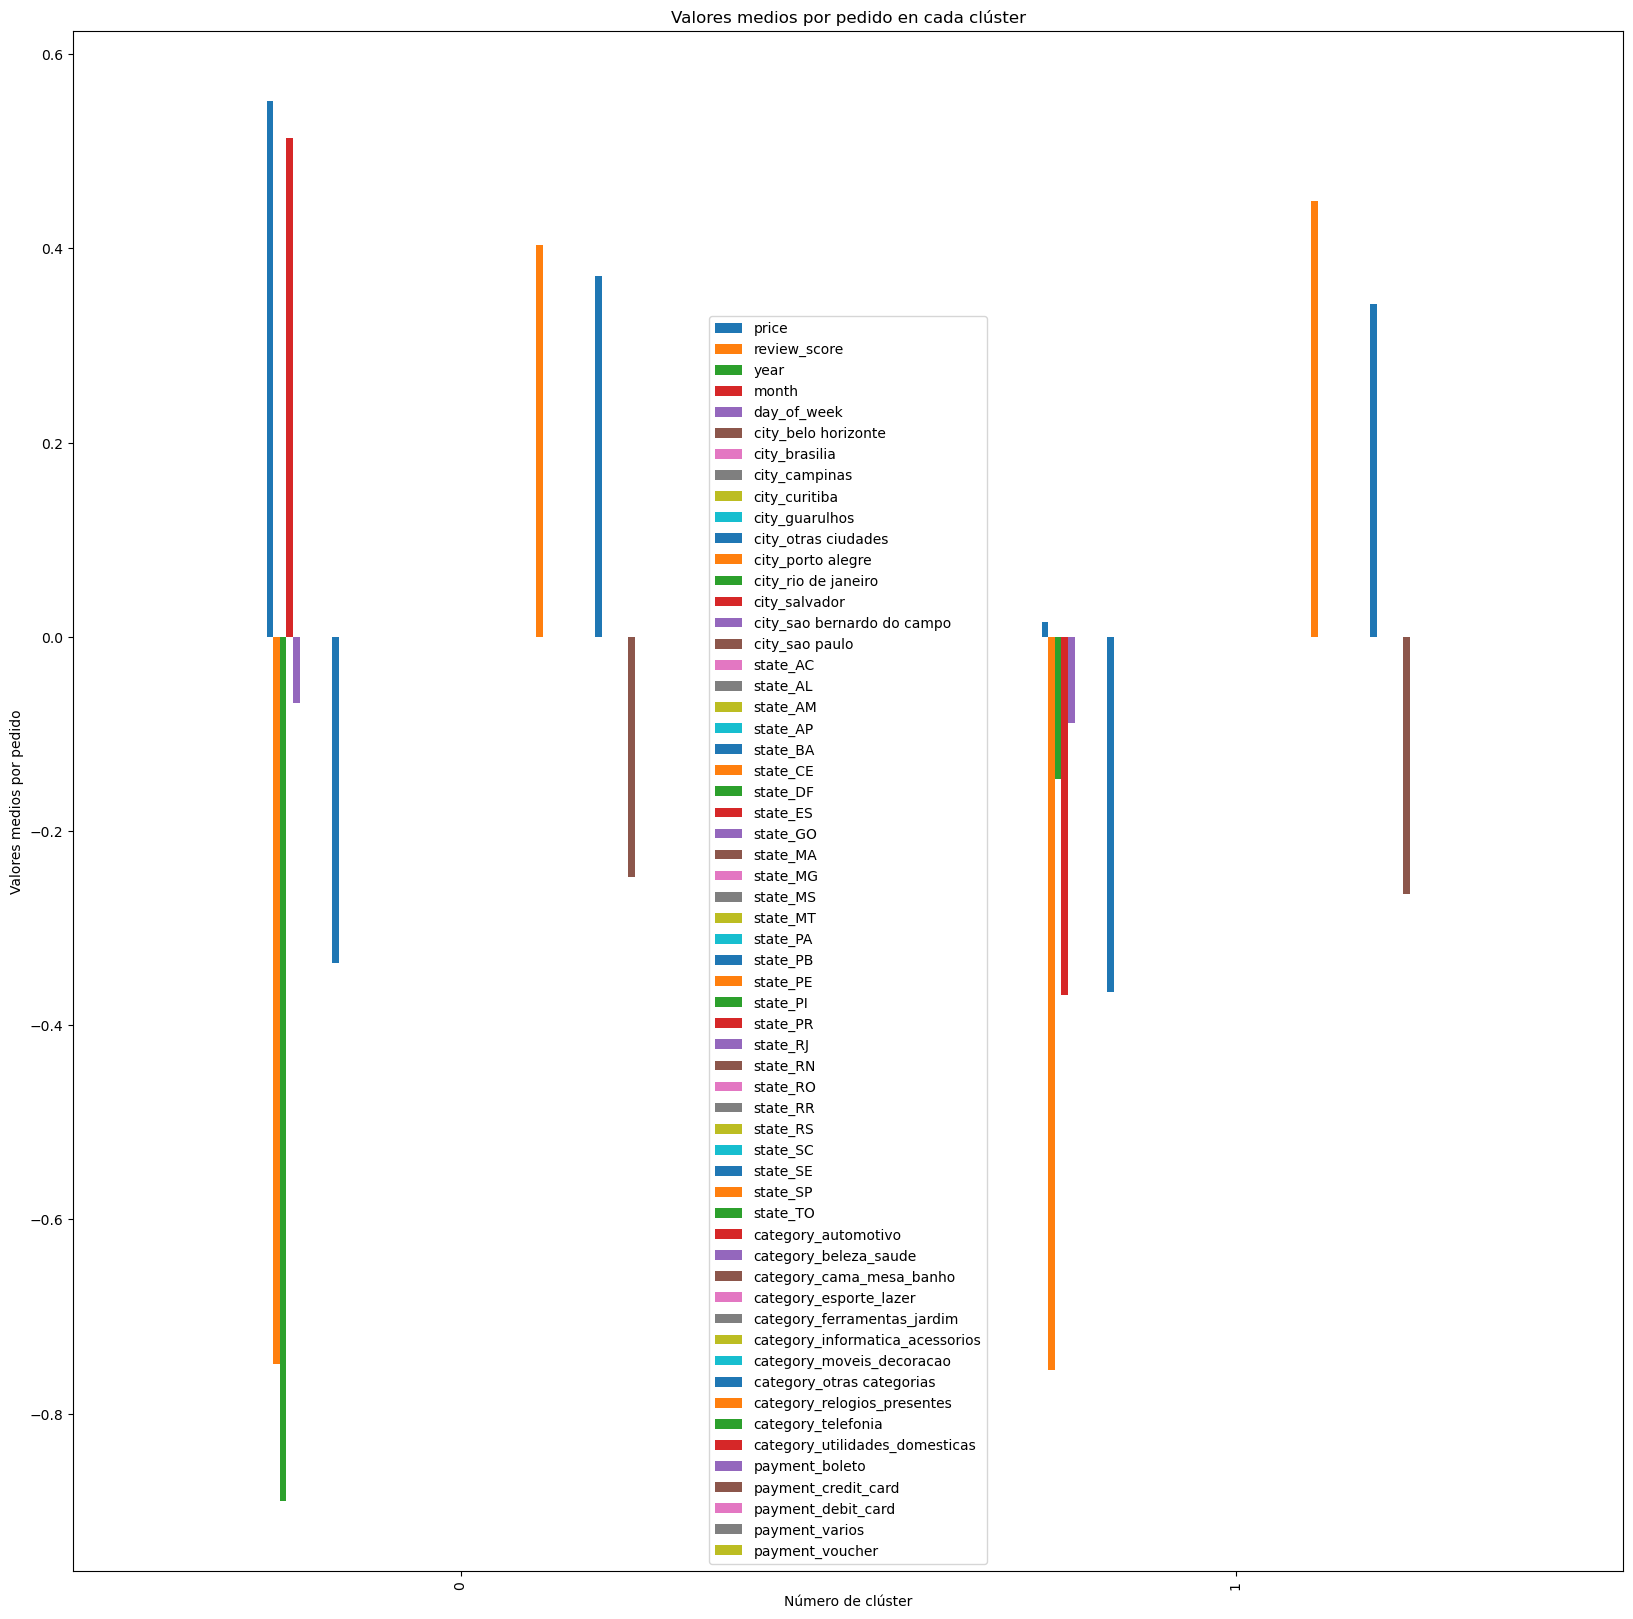

In [29]:
df_total.groupby('cluster').mean().plot(kind='bar', figsize=(20,20))
plt.title('Valores medios por pedido en cada clúster')
plt.xlabel(u'Número de clúster')
_ = plt.ylabel('Valores medios por pedido')

In [30]:
df_total[:6]

,price,review_score,year,month,day_of_week,city_belo horizonte,city_brasilia,city_campinas,city_curitiba,city_guarulhos,...,category_otras categorias,category_relogios_presentes,category_telefonia,category_utilidades_domesticas,payment_boleto,payment_credit_card,payment_debit_card,payment_varios,payment_voucher,cluster
8684,0.536842,-2.5,-1.0,0.2,-0.333333,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
36249,0.785158,-2.5,0.0,0.4,0.333333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
22089,0.264105,-1.0,0.0,0.2,-0.666667,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
88766,-0.128421,-1.0,-1.0,0.6,0.333333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
71321,0.474421,-1.0,-1.0,-0.8,-0.333333,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1
11010,0.306316,0.0,0.0,-1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1
